In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, time
from sklearn.cluster import DBSCAN
from sklearn import metrics
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
import os
%matplotlib inline

In [2]:
# define the number of kilometers in one radian
kms_per_radian = 6371.0088

In [5]:
#os.chdir(r"'data/singleuseranalysis")
#df = pd.read_table('dfchangepoint.csv', sep=',')
df = pd.read_csv('data/dfchangepoint.csv', encoding='utf-8')

In [6]:
df

,lat,long,date,time,userid,date_time,Transportation_Mode,col,row,time_delta,...,segmentid,Vincenty_distance,velocity,acceleration,velocity_rate,jerk,acc_rate,bearing,bearing_rate,rate_bearing_rate
0,39.979547,116.306813,2011-08-29,10:13:15,141.0,2011-08-29 10:13:15,walk,6.0,11.0,1.0,...,1.0,1.551677,1.551677,5.501639e-01,3.545609e-01,-1.017630,-1.849685e+00,33.297150,-5.088421e+00,14.341677
1,39.991755,116.309247,2011-09-02,11:00:06,141.0,2011-09-02 11:00:06,subway,6.0,12.0,1.0,...,2.0,0.936172,0.936172,-1.088423e-02,-1.162632e-02,-0.174173,1.600235e+01,171.288476,8.711524e+00,-8.711524
2,39.976225,116.337132,2011-09-02,11:23:44,141.0,2011-09-02 11:23:44,subway,7.0,11.0,1.0,...,1.0,10.396209,10.396209,-9.930727e+00,-9.552258e-01,10.943352,-1.101969e+00,33.111536,3.338015e+01,-251.177107
3,39.975575,116.336827,2011-09-02,11:24:48,141.0,2011-09-02 11:24:48,walk,7.0,11.0,1.0,...,2.0,0.573136,0.573136,1.273253e-01,2.221556e-01,-0.262618,-2.062574e+00,165.670813,-2.313443e+01,11.620013
4,39.975452,116.337508,2011-09-02,12:11:01,141.0,2011-09-02 12:11:01,walk,7.0,11.0,1.0,...,1.0,1.471056,1.471056,3.431064e+00,2.332382e+00,-1.999719,-5.828277e-01,104.627203,-2.241142e+02,219.775017
5,39.984832,116.327330,2011-09-03,04:34:10,141.0,2011-09-03 04:34:10,bus,7.0,11.0,1.0,...,2.0,1.146264,1.146264,-3.592058e-02,-3.133709e-02,0.045009,-1.253008e+00,-14.327327,1.432733e+01,-21.604746
6,39.986000,116.299078,2011-09-03,04:47:15,141.0,2011-09-03 04:47:15,walk,5.0,11.0,1.0,...,3.0,1.470844,1.470844,1.153400e-01,7.841756e-02,3.156005,2.736262e+01,-75.370624,5.440875e+01,16.076952
7,39.987800,116.300507,2011-09-03,05:13:18,141.0,2011-09-03 05:13:18,walk,6.0,11.0,1.0,...,1.0,2.385750,2.385750,6.230414e-02,2.611511e-02,-1.483464,-2.381004e+01,-134.388530,5.311812e+01,164.389286
8,39.983732,116.303922,2011-09-03,06:22:44,141.0,2011-09-03 06:22:44,subway,6.0,11.0,1.0,...,2.0,1.063008,1.063008,-2.088698e-01,-1.964894e-01,0.846665,-4.053552e+00,69.550280,2.044972e+01,27.755751
9,39.974913,116.333420,2011-09-03,06:46:52,141.0,2011-09-03 06:46:52,walk,7.0,11.0,1.0,...,3.0,2.497784,2.497784,6.915989e-01,2.768850e-01,-2.402868,-3.474367e+00,-121.340000,1.089272e+01,70.859336


In [7]:
# represent points consistently as (lat, lon)
coords = df.as_matrix(columns=['lat', 'long'])

# define epsilon as 1.5 kilometers, converted to radians for use by haversine
epsilon = 1.5 / kms_per_radian

In [8]:
start_time = time.time()
db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_

# get the number of clusters
num_clusters = len(set(cluster_labels))

# all done, print the outcome
message = 'Clustered {:,} points down to {:,} clusters, for {:.1f}% compression in {:,.2f} seconds'
print(message.format(len(df), num_clusters, 100*(1 - float(num_clusters) / len(df)), time.time()-start_time))
print('Silhouette coefficient: {:0.03f}'.format(metrics.silhouette_score(coords, cluster_labels)))

Clustered 79 points down to 6 clusters, for 92.4% compression in 0.02 seconds
Silhouette coefficient: 0.659


In [9]:
# turn the clusters in to a pandas series, where each element is a cluster of points
clusters = pd.Series([coords[cluster_labels==n] for n in range(num_clusters)])

In [10]:
def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centermost_point)

centermost_points = clusters.map(get_centermost_point)

In [11]:
# unzip the list of centermost points (lat, lon) tuples into separate lat and lon lists
lats, lons = zip(*centermost_points)

# from these lats/lons create a new df of one representative point for each cluster
rep_points = pd.DataFrame({'lon':lons, 'lat':lats})
rep_points.tail()

,lat,lon
1,39.994715,116.400880
2,40.026730,116.403173
3,39.919478,116.351400
4,39.991343,116.196833
5,40.001027,116.270880


In [12]:
df

,lat,long,date,time,userid,date_time,Transportation_Mode,col,row,time_delta,...,segmentid,Vincenty_distance,velocity,acceleration,velocity_rate,jerk,acc_rate,bearing,bearing_rate,rate_bearing_rate
0,39.979547,116.306813,2011-08-29,10:13:15,141.0,2011-08-29 10:13:15,walk,6.0,11.0,1.0,...,1.0,1.551677,1.551677,5.501639e-01,3.545609e-01,-1.017630,-1.849685e+00,33.297150,-5.088421e+00,14.341677
1,39.991755,116.309247,2011-09-02,11:00:06,141.0,2011-09-02 11:00:06,subway,6.0,12.0,1.0,...,2.0,0.936172,0.936172,-1.088423e-02,-1.162632e-02,-0.174173,1.600235e+01,171.288476,8.711524e+00,-8.711524
2,39.976225,116.337132,2011-09-02,11:23:44,141.0,2011-09-02 11:23:44,subway,7.0,11.0,1.0,...,1.0,10.396209,10.396209,-9.930727e+00,-9.552258e-01,10.943352,-1.101969e+00,33.111536,3.338015e+01,-251.177107
3,39.975575,116.336827,2011-09-02,11:24:48,141.0,2011-09-02 11:24:48,walk,7.0,11.0,1.0,...,2.0,0.573136,0.573136,1.273253e-01,2.221556e-01,-0.262618,-2.062574e+00,165.670813,-2.313443e+01,11.620013
4,39.975452,116.337508,2011-09-02,12:11:01,141.0,2011-09-02 12:11:01,walk,7.0,11.0,1.0,...,1.0,1.471056,1.471056,3.431064e+00,2.332382e+00,-1.999719,-5.828277e-01,104.627203,-2.241142e+02,219.775017
5,39.984832,116.327330,2011-09-03,04:34:10,141.0,2011-09-03 04:34:10,bus,7.0,11.0,1.0,...,2.0,1.146264,1.146264,-3.592058e-02,-3.133709e-02,0.045009,-1.253008e+00,-14.327327,1.432733e+01,-21.604746
6,39.986000,116.299078,2011-09-03,04:47:15,141.0,2011-09-03 04:47:15,walk,5.0,11.0,1.0,...,3.0,1.470844,1.470844,1.153400e-01,7.841756e-02,3.156005,2.736262e+01,-75.370624,5.440875e+01,16.076952
7,39.987800,116.300507,2011-09-03,05:13:18,141.0,2011-09-03 05:13:18,walk,6.0,11.0,1.0,...,1.0,2.385750,2.385750,6.230414e-02,2.611511e-02,-1.483464,-2.381004e+01,-134.388530,5.311812e+01,164.389286
8,39.983732,116.303922,2011-09-03,06:22:44,141.0,2011-09-03 06:22:44,subway,6.0,11.0,1.0,...,2.0,1.063008,1.063008,-2.088698e-01,-1.964894e-01,0.846665,-4.053552e+00,69.550280,2.044972e+01,27.755751
9,39.974913,116.333420,2011-09-03,06:46:52,141.0,2011-09-03 06:46:52,walk,7.0,11.0,1.0,...,3.0,2.497784,2.497784,6.915989e-01,2.768850e-01,-2.402868,-3.474367e+00,-121.340000,1.089272e+01,70.859336


In [13]:
rs = rep_points.apply(lambda row: df[(df['lat']==row['lat']) & (df['long']==row['long'])].iloc[0], axis=1)
#rs.tail()

KeyError: ('long', 'occurred at index 0')

NameError: name 'rs' is not defined

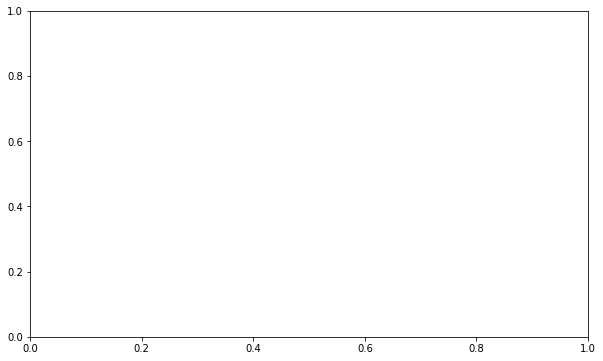

In [16]:
# plot the final reduced set of coordinate points vs the original full set
fig, ax = plt.subplots(figsize=[10, 6])
rs_scatter = ax.scatter(rs['lon'], rs['lat'], c='#99cc99', edgecolor='None', alpha=0.7, s=120)
df_scatter = ax.scatter(df['lon'], df['lat'], c='k', alpha=0.9, s=3)
ax.set_title('Full data set vs DBSCAN reduced set')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend([df_scatter, rs_scatter], ['Full set', 'Reduced set'], loc='upper right')
plt.show()